# Teoría

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
from IPython.display import display, Markdown
import pandas_datareader.data as web
import datetime

## 1- 10 puntos

La formula del R2 es:

$$R^2 = \frac{Var(errorPromedio) - Var(errorModelo)}{Var(errorPromedio)}$$ 

Convenceme que entiendes esta formula y porque esto tiene sentido


### Respuesta
La formula del r2, que es una métrica que nos ayuda a saber que tan bueno es nuestro modelo, es un cambio porcentual entre el error promedio y el error de nuestro modelo, y así sabemos que tanto mejora nuestro modelo contra el promedio de los datos.

La Var(errorPromedio) nos dice la variación de los datos contra la media (su varianza), y Var(erroModelo) nos dice la variación de los datos contra nuestro modelo (su varianza).

Al restar ambos obtenemos la diferencia entre lo que varían los modelos y al hacer la división entre Var(errorPromedio), nos da el resultado de manera porcentual para entenderlo mejor. Este resultado fue el cambio porcentual entre las varianzas de los errores del promedio y el error de nustro modelo, llegando a lo que es el r2 que es el cambio porcentual entre el erorr promedio y del modelo para saber que tanto mejora nuestro modelo a comparación de la media de los datos.

## 2- 20 puntos 

¿Qué es una regresión lineal y para que sirve?
¿Qué es el gradiente descendiente? ¿Cómo uso eso para encontrar los mejores coeficientes de una regresión lineal?


Responde estas preguntas, convenceme que entiendes que es una regresión lineal y de donde salen los coeficientes

### Respuesta
La regresión lineal es un método el cual obtiene una ecuación $y = mx + b$ la cual mejor se ajuste a los datos que se tengan y busca explicar la relación que existe entre la variable independiente y la dependiente. La linea que se traza con la ecuación busca ajustarse lo mejor posble a los datos para explicar lo más que pueda la variación de los datos, esto sirve para identificar tendencias, ver la relación entre las variables y hacer predicciones con este modelo.

El gradiente descendiente es un proceso de optimización repetitivo (como un ciclo for) el cual busca obtener los coeficientes que minimicen una función, basándose en el error cuadrático entre los valores reales y nuestro modelo. Inicia con valores iniciales de los coeficientes y usando derivadas parciales de las funciones que obtiene va repitiendo el proceso hasta encontrar el error más pequeño y de ahi salen los coeficientes.

En la fórmula $b$ es la intersección en el eje $y$ y $m$ es la pendiente de la recta de nuestro modelo.

## 3- 5 puntos 
¿Por qué hay empresas con valuaciones bajas respecto a sus ganancias? 

### Respuesta
Las ganancias de una empresa es un factor importante al momento de analizarlas y valuarlas, pero a pesar de ser muy buenas o malas, no es el único factor que afecta la valuación de una empresa. Empresas que tienen un buen nivel de ganancias puden tener una valuación baja debido a limitadas oportunidades de crecimiento, saturación de mercado o altos niveles de deuda.

Además una de las cosas que más afectan la valuación de una empresa es el sentimiento de mercado, las expectativas sobre una empresa pueden ser malas, o la empresa ser percibida como poco atractiva, por lo que a pesar de tener buenas ganancias su valuación puede ser baja. Dentro de esta categoría entran las consideradas como "empresas aburridas".

## 4- 10 puntos

La utilidad de un activo es:

$$Utiliad = E[P] - \alpha *\frac{1}{2} Var(P) $$

Explica porque esto tiene sentido  en el mundo de los econos

### Respuesta
El mundo de los econos supone que todos somos racionales y lo único que nos interesa es maximizar nuestras ganancias, lo cual en el mundo de las inversiones no esta tan alejado de la realidad.

Esta fórmula tiene sentido ya que busca la utilidad con base en el rendimiento que ganas contra el riesgo que se asume. $E[P]$ representa las ganancias esperadas y a esto se le resta el riesgo que se corre $Var(P)$ multiplicado por un coeficiente de aversión al riesgo lo cual le da una ponderación, ya que todos tienen un nivel de tolerancia al riesgo distinto, obteniendo así nuestra utilidad.

Esto nos permite tomar decisiones de inversión que maximicen nuestras ganancias y utilidad según el riesgo que estemos dispuestos a correr en dicha inversión.

## 5- 5 puntos 
Explica en 3 renglones la hopitesis de mercados eficientes

### Respuesta

La hipótesis de mercados eficientes dice que el precio de una acción ya tiene reflejada toda la información que existe, incluso expectativas a futuro, por lo que no es posible tener rendimientos mayores al mercado de manera constante en el largo plazo. Esto implica que no hay acciones "baratas" o "caras" y que el precio de la acción siempre es el justo ya que el mercado se ajusta rápidamente a nueva información disponible.

# Práctica

### 30%

Baja del 2016 a 2021, de forma diario las acciones de:


- Apple
- Amazon
- Discover
- Cotsco
- Starbucks


- Obten el portafolio de mínima varianza
- Obten una gráfica de todos los posibles portafolios
- Calcula la beta de cada uno de esos activos
- Calcula el R2 de cada uno de esos activos
- Cuanto debes invertir en ese portafolio dado los cooeficientes de aversión : [1, 2, 3, 4, 5, 6, 6, 7]
- Obten el R2 y Beta con bootstrap de cada uno de esos activos
  Responde: probabilidad beta > 1  y probabilidad r2 > 0.5
  
  
### CAPM, Fama french y 5 factores (20%)

Sobre el portafolio anterior, crea los 3 distintos modelos vistos en clase. 

¿Cuál es el R2 de cada uno?  Crea un boostrap de cada uno de los R2

Explica conclusiones

## Código

### Simulaciones

In [2]:
np.random.seed(27) # Para poder escribir en Markdown sin que cambien los resultados
tickers = ['AAPL','AMZN','DFS','COST','SBUX']
tickers2 = ['VTI','XOM']
tickers3 =['VTI', 'AAPL','AMZN','DFS','COST','SBUX']

start_date = '2016-01-01'
end_date = '2024-05-01'

St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
St.head()
rt = St.pct_change().dropna()

St2 = yf.download(tickers2, start=start_date, end=end_date)['Adj Close']
St2.head()
rt2 = St2.pct_change().dropna()

St3 = yf.download(tickers3, start=start_date, end=end_date)['Adj Close']
St3.head()
rt3 = St3.pct_change().dropna()

df = pd.DataFrame({
    'means': rt.mean() * 252,
    'vol': rt.std() * np.sqrt(252)
})
df.T

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  6 of 6 completed


,AAPL,AMZN,COST,DFS,SBUX
means,0.27843,0.259147,0.226451,0.210297,0.106241
vol,0.29057,0.329134,0.222038,0.402291,0.270038


In [3]:
# Para las simulaciones
sigma = rt.cov()
n_port = 10000
n_act = len(rt.keys())

W = np.random.dirichlet((1,) * n_act, size=n_port)

# Obten los rendimientos
rendimientos = W.dot(rt.mean()) * 252

# Calcula las volatilidades
zeros = np.zeros(n_port)
for i in range(len(zeros)):
    zeros[i] = np.sqrt(W[i,:].dot(sigma).dot(W[i,:])) * np.sqrt(252)
volatility = zeros

# Sharpe
rf = 0.03
sharpe = (rendimientos - rf) / volatility

# Data frame de resultados
resultados = pd.DataFrame({
    'rend': rendimientos,
    'vol': volatility,
    'sharpe': sharpe
})
pesos = pd.DataFrame(W, columns=rt.keys())
resultados = pd.concat([resultados, pesos], axis=1)
resultados

,rend,vol,sharpe,AAPL,AMZN,COST,DFS,SBUX
0,0.225315,0.238653,0.818404,0.091257,0.277263,0.218751,0.333176,0.079552
1,0.240362,0.245716,0.856116,0.441525,0.254189,0.026747,0.153886,0.123654
2,0.241813,0.237602,0.891462,0.280675,0.251483,0.178220,0.262990,0.026633
3,0.230286,0.205313,0.975518,0.141222,0.167333,0.565947,0.058717,0.066781
4,0.228526,0.206733,0.960304,0.037978,0.163343,0.686038,0.079774,0.032867
...,...,...,...,...,...,...,...,...
9995,0.200094,0.229749,0.740346,0.199182,0.204831,0.084529,0.173704,0.337754
9996,0.220498,0.231301,0.823592,0.130028,0.381070,0.152222,0.147045,0.189635
9997,0.240250,0.211576,0.993733,0.202429,0.220617,0.494838,0.057039,0.025078
9998,0.194261,0.216906,0.757293,0.002185,0.195160,0.301105,0.207651,0.293899


### Portafolio mínima varianza

In [4]:
min_var = resultados[resultados.vol == resultados.vol.min()]
min_var

,rend,vol,sharpe,AAPL,AMZN,COST,DFS,SBUX
521,0.200535,0.198725,0.858149,0.089408,0.055265,0.55278,0.038432,0.264114


* Apple: 8.94%
* Amazon: 5.52%
* Costco: 55.27%
* Discover: 3.84%
* Starbucks: 26.41%

### Gráfica de los portafolios

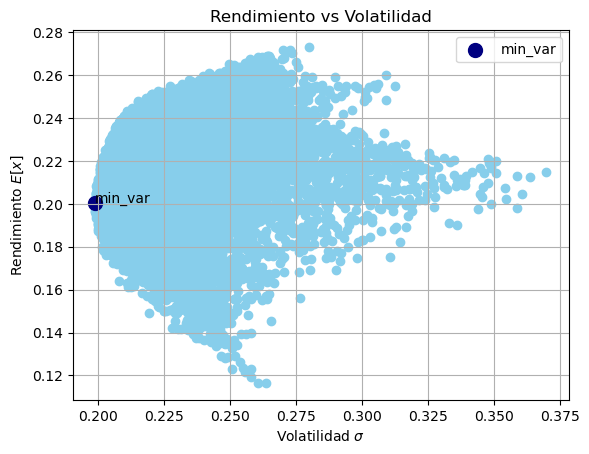

In [5]:
plt.scatter(resultados.vol, resultados.rend, c = 'skyblue')
plt.scatter(min_var.vol, min_var.rend, c = 'navy', s=100, label = 'min_var')
plt.text(min_var.vol, min_var.rend, 'min_var')

plt.legend()
plt.title('Rendimiento vs Volatilidad')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')
plt.grid()

### Market Beta y r2

In [6]:
# Calculemos beta y R2 de cada acción 
warnings.filterwarnings("ignore")

r2s = []
betas = []
rendimiento = []

for i in tickers:
    X = rt2[['VTI']]
    y = rt[[i]]
    # Beta
    model = LinearRegression().fit(X, y)
    beta = model.coef_[0][0]
    betas.append(beta)
    # R2
    predictions = model.predict(X)
    r2 = r2_score(y_true = y, y_pred = predictions)
    r2s.append(r2)

In [7]:
df_info = pd.DataFrame({
    'tickers': tickers,
    'betas': betas,
    'r2': r2s
})
df_info

,tickers,betas,r2
0,AAPL,1.172828,0.563829
1,AMZN,1.116404,0.398181
2,DFS,1.501476,0.482101
3,COST,0.696069,0.340120
4,SBUX,0.990599,0.465724


### Porcentaje de inversión según aversión al riesgo

In [8]:
emv = resultados[resultados.sharpe == resultados.sharpe.max()]
emv

,rend,vol,sharpe,AAPL,AMZN,COST,DFS,SBUX
6749,0.24784,0.215137,1.012563,0.360871,0.117375,0.47008,0.048101,0.003573


In [9]:
emv2 = emv.drop(['rend','vol','sharpe'], axis = 1)

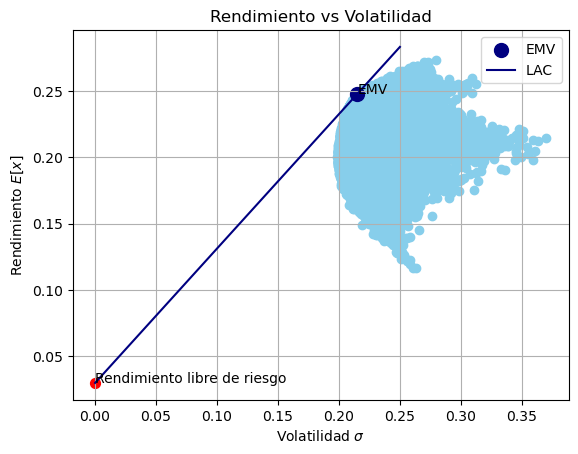

In [10]:
erp = emv.rend.iloc[0]
sp = emv.vol.iloc[0]

s = np.linspace(0,0.25,10)

lac = rf + s * emv.sharpe.iloc[0]

plt.scatter(resultados.vol, resultados.rend, c = 'skyblue')

plt.scatter(0, rf, s = 50, c = 'red')
plt.text(0, rf, 'Rendimiento libre de riesgo')

plt.scatter(emv.vol, emv.rend, c = 'navy', s=100, label = 'EMV')
plt.text(emv.vol, emv.rend, 'EMV')

plt.plot(s, lac, c = 'navy', label = 'LAC')

plt.legend()
plt.title('Rendimiento vs Volatilidad')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')
plt.grid()

In [11]:
alpha = [1,2,3,4,5,6,7,8]

w_opt= []
for i in alpha:
    w_opt.append(((erp-rf)/(i*sp**2)))

riesgo = []
for j in range(8):
    riesgo.append(w_opt[j]*sp)

dist = pd.DataFrame()
dist['aversion'] = alpha
dist['peso_acciones'] = w_opt
dist['peso_bonos'] = 1-dist.peso_acciones
dist['rendimientos'] = dist.peso_acciones * erp + dist.peso_bonos * rf
dist['volatilidad'] = riesgo
dist

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,4.706590,-3.706590,1.055284,1.012563
1,2,2.353295,-1.353295,0.542642,0.506281
2,3,1.568863,-0.568863,0.371761,0.337521
3,4,1.176648,-0.176648,0.286321,0.253141
4,5,0.941318,0.058682,0.235057,0.202513
5,6,0.784432,0.215568,0.200881,0.168760
6,7,0.672370,0.327630,0.176469,0.144652
7,8,0.588324,0.411676,0.158160,0.126570


### Bootsrap beta

In [12]:
betas = []
n_reps = 1000
for i in range(n_reps):
    flag_frame = rt3.sample(len(rt3), replace=True)
    model = LinearRegression()
    temp_betas = []
    for j, ticker in enumerate(tickers3[1:]):
        X = flag_frame[['VTI']]
        y = flag_frame[[ticker]]
        model.fit(X, y)
        beta = model.coef_[0][0]
        temp_betas.append(beta)
    betas.append(temp_betas)

df_betas = pd.DataFrame(betas, columns=tickers3[1:])

df_betas

,AAPL,AMZN,DFS,COST,SBUX
0,1.146537,1.002202,1.624488,0.630638,1.056174
1,1.148144,1.060440,1.569954,0.630144,1.026487
2,1.145453,1.058931,1.600306,0.661847,1.035782
3,1.129743,1.078283,1.514390,0.698582,0.964418
4,1.120294,1.156607,1.433451,0.689150,0.943269
...,...,...,...,...,...
995,1.137517,1.100389,1.503287,0.753474,0.972902
996,1.163809,1.099264,1.531474,0.683008,1.022737
997,1.136905,0.993883,1.651855,0.601334,1.019614
998,1.204240,1.022926,1.570657,0.706745,0.988658


### Probabilidad beta > 1 para cada activo

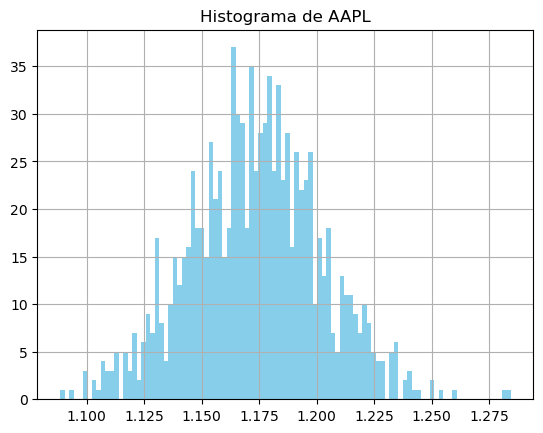

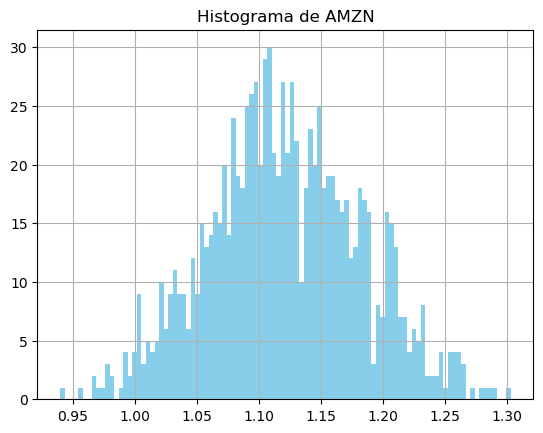

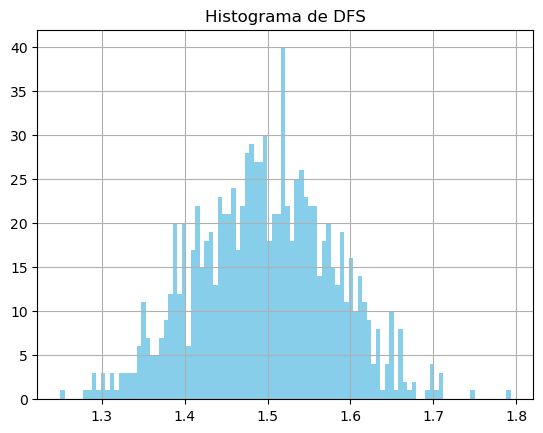

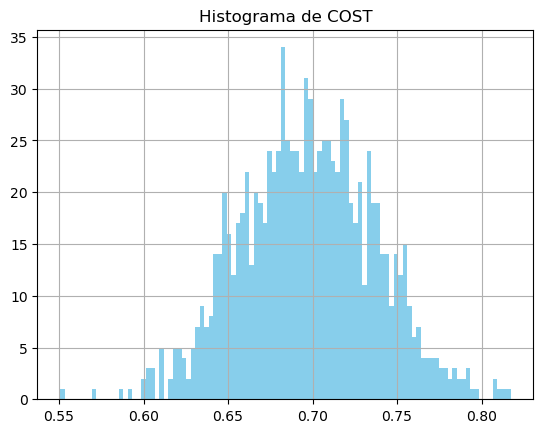

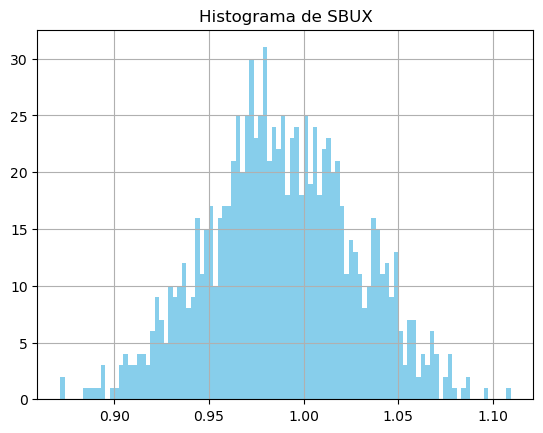

In [13]:
for col in df_betas.columns:
    plt.hist(df_betas[col], bins=100, color = 'skyblue')
    plt.title("Histograma de " + col)
    plt.grid()
    plt.show()

In [14]:
for i in tickers:
    print('Probabilidad que la beta de', i, 'sea mayor a 1')
    print((df_betas[i] > 1).mean())
    print()

Probabilidad que la beta de AAPL sea mayor a 1
1.0

Probabilidad que la beta de AMZN sea mayor a 1
0.98

Probabilidad que la beta de DFS sea mayor a 1
1.0

Probabilidad que la beta de COST sea mayor a 1
0.0

Probabilidad que la beta de SBUX sea mayor a 1
0.383



### Bootstrap de r2

In [15]:
r2 = []
n = 1000
for i in range(n):
    flag_frame = rt3.sample(len(rt3), replace=True)
    temp_r2 = []
    for j, ticker in enumerate(tickers3[1:]):
        X = flag_frame[['VTI']]
        y = flag_frame[[ticker]]
        model = LinearRegression().fit(X, y)
        predicciones = model.predict(X)
        flag_r2 = r2_score(y_true=y, y_pred=predicciones)
        temp_r2.append(flag_r2)
    r2.append(temp_r2)

df_r2 = pd.DataFrame(r2, columns=tickers3[1:])
df_r2

,AAPL,AMZN,DFS,COST,SBUX
0,0.590344,0.400633,0.515553,0.415951,0.520104
1,0.552863,0.378852,0.462030,0.320057,0.458585
2,0.550305,0.376228,0.475105,0.394863,0.475902
3,0.559503,0.403131,0.462427,0.341874,0.458771
4,0.533513,0.399490,0.400706,0.327213,0.409925
...,...,...,...,...,...
995,0.596081,0.422032,0.497325,0.362835,0.503375
996,0.599718,0.402374,0.489582,0.336304,0.475715
997,0.530488,0.359829,0.432527,0.323395,0.415979
998,0.598364,0.461111,0.440860,0.405594,0.428627


### Probabilidad r2 > 0.5 para cada activo

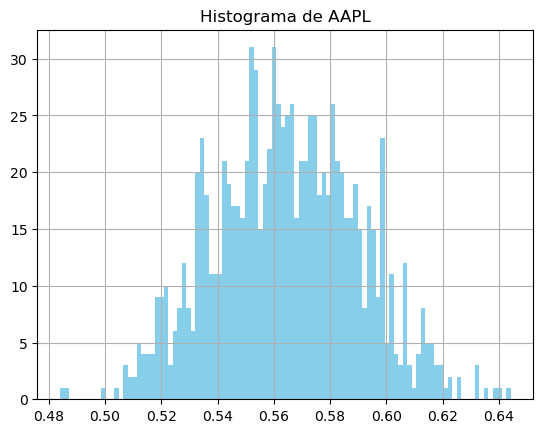

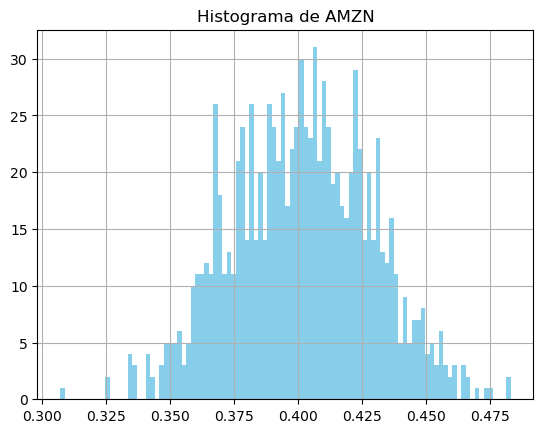

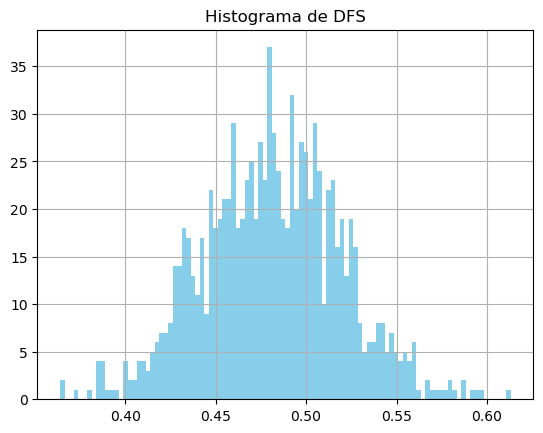

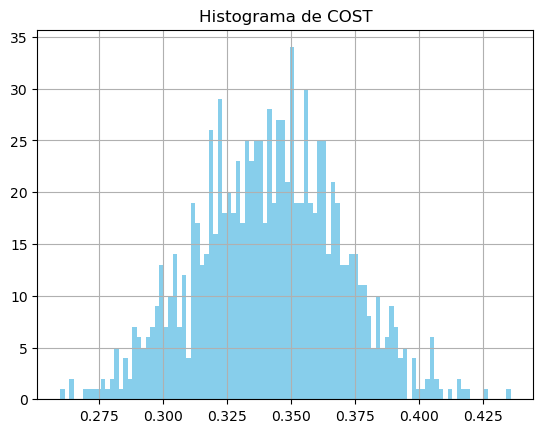

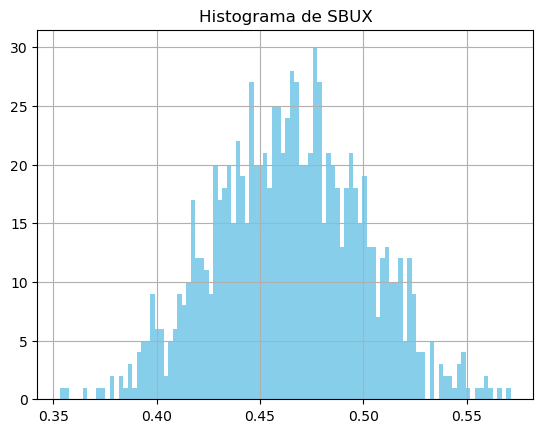

In [16]:
for col in df_r2.columns:
    plt.hist(df_r2[col], bins=100, color='skyblue')
    plt.title("Histograma de " + col)
    plt.grid()
    plt.show()

In [17]:
for i in tickers:
    print('Probabilidad de que el r2 de', i, 'sea mayor a 0.5')
    print((df_r2[i] > 0.5).mean())
    print()

Probabilidad de que el r2 de AAPL sea mayor a 0.5
0.997

Probabilidad de que el r2 de AMZN sea mayor a 0.5
0.0

Probabilidad de que el r2 de DFS sea mayor a 0.5
0.316

Probabilidad de que el r2 de COST sea mayor a 0.5
0.0

Probabilidad de que el r2 de SBUX sea mayor a 0.5
0.165



### CAPM, Fama French y 5 factores

In [18]:
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2024, 5, 1)

ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)

factors_df = ff_factores[0] / 100
factors_df.index = factors_df.index.to_timestamp()

In [19]:
stock_data = yf.download(tickers, start_date, end_date, interval='1mo')['Adj Close']
rt = stock_data.pct_change().dropna()

fama_french_df = pd.merge(rt, factors_df, on='Date')

[*********************100%%**********************]  5 of 5 completed


In [20]:
def run_all_models(data, ticker):
    flag_data = data.copy()
    flag_data[ticker + '_minus_RF'] = data[ticker] - data['RF']
    y = flag_data[[ticker + '_minus_RF']] 

    # CAPM 
    X_capm = flag_data[['Mkt-RF']]
    model_capm = LinearRegression().fit(X_capm, y)
    prediction_capm = model_capm.predict(X_capm)
    r2_capm = r2_score(y_pred=prediction_capm, y_true=y)
    summary_capm = {str(X_capm.keys().values): list(model_capm.coef_[0])}

    # 3 factor model 
    X_3factor = flag_data[['Mkt-RF', 'SMB', 'HML']]
    model_3factor = LinearRegression().fit(X_3factor, y)
    prediction_3factor = model_3factor.predict(X_3factor)
    r2_3factor = r2_score(y_pred=prediction_3factor, y_true=y)
    summary_3factor = {str(X_3factor.keys().values): list(model_3factor.coef_[0])}
    
    
    # 5 factor
    X_5factor = flag_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    model_5factor = LinearRegression().fit(X_5factor, y)
    prediction_5factor = model_5factor.predict(X_5factor)
    r2_5factor = r2_score(y_pred=prediction_5factor, y_true=y)
    summary_5factor = {str(X_5factor.keys().values): list(model_5factor.coef_[0])}
    
    summary = {
        'CAPM': {'BETAS': summary_capm, 'R2': r2_capm},
        '3 factor': {'BETAS': summary_3factor, 'R2': r2_3factor},
        '5 factor': {'BETAS': summary_5factor, 'R2': r2_5factor}

    }
    return summary

In [21]:
fama_french_df['emv'] = emv.AAPL.values[0] * fama_french_df['AAPL'] + emv.AMZN.values[0] * fama_french_df['AMZN'] + emv.DFS.values[0] * fama_french_df['DFS'] + emv.COST.values[0] * fama_french_df['COST'] + emv.SBUX.values[0] * fama_french_df['SBUX']

In [22]:
fama_french_df

,AAPL,AMZN,COST,DFS,SBUX,Mkt-RF,SMB,HML,RMW,CMA,RF,emv
Date,,,,,,,,,,,,
2016-02-01,-0.006677,-0.058739,-0.007213,0.013758,-0.042126,-0.0007,0.0088,-0.0057,0.0325,0.0202,0.0002,-0.012183
2016-03-01,0.133327,0.074423,0.053171,0.103651,0.028948,0.0696,0.0107,0.0119,0.0077,-0.0008,0.0002,0.086933
2016-04-01,-0.139921,0.111094,-0.059970,0.105067,-0.058124,0.0091,0.0123,0.0328,-0.0297,0.0190,0.0001,-0.060798
2016-05-01,0.065287,0.095817,0.007291,0.009597,-0.023831,0.0178,-0.0061,-0.0166,-0.0109,-0.0248,0.0001,0.038610
2016-06-01,-0.036831,-0.009920,0.055589,-0.051973,0.044268,-0.0005,0.0045,-0.0148,0.0140,0.0194,0.0002,0.009334
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,0.112315,0.097678,0.072949,0.133041,0.076540,0.0884,-0.0012,0.0164,-0.0391,-0.0100,0.0044,0.092961
2023-12-01,0.014918,0.040044,0.115652,0.218411,-0.027819,0.0487,0.0732,0.0493,-0.0307,0.0132,0.0043,0.074856
2024-01-01,-0.042227,0.021456,0.076660,-0.061210,-0.031038,0.0071,-0.0574,-0.0238,0.0069,-0.0096,0.0047,0.020261


In [23]:
run_all_models(fama_french_df, 'emv')

{'CAPM': {'BETAS': {"['Mkt-RF']": [0.99204659470237]},
  'R2': 0.6348372303897014},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.0592443635936393,
    -0.2378876768730605,
    -0.4179173200810632]},
  'R2': 0.7497478944259752},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.0215447576988765,
    -0.10722274920842298,
    -0.4593098634342903,
    0.31815783929705865,
    -0.03161070069922787]},
  'R2': 0.760260788439833}}

El R2 para los modelos es el siguiente:

* CAPM: 0.6348
* Fama French (3 factor): 0.7497
* 5 factor: 0.7602

Esto significa que el modelo del CAPM explica el 63% de la variación, el Fama French explica el 74% de la variación y por últio el 5 factor model explica el 76% de la variación.

### Bootsrap de r2 de CAPM, 3 factor y 5 factor

				 Mean: 0.6374


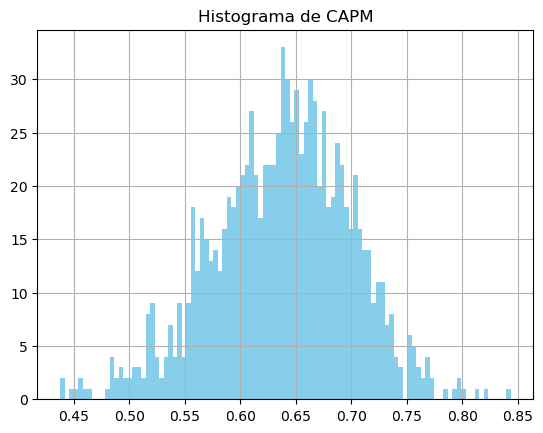


				 Mean: 0.755


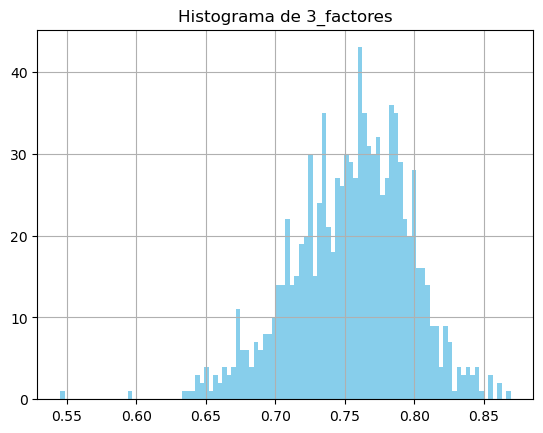


				 Mean: 0.7718


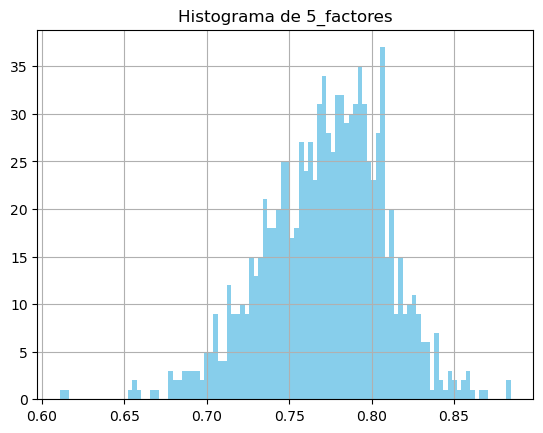

In [24]:
n = 1000
r2_c = []
bsr2_3f = []
bsr2_5f = []
for i in range(n):
    
    flag_frame = fama_french_df.sample(len(fama_french_df), replace = True)
    y = flag_frame['emv'] - flag_frame['RF']
    
    # CAPM
    X_capm = flag_frame[['Mkt-RF']]
    model_capm = LinearRegression().fit(X_capm, y)
    prediction_capm = model_capm.predict(X_capm)
    r2_capm = np.round(r2_score(y_pred=prediction_capm, y_true=y),4)
    r2_c.append(r2_capm)
    
    # 3 factor
    X_3f = flag_frame[['Mkt-RF','SMB','HML']]
    model_3f = LinearRegression().fit(X_3f, y)
    prediction_3f = model_3f.predict(X_3f)
    r2_3f = np.round(r2_score(y_pred=prediction_3f, y_true=y),4)
    bsr2_3f.append(r2_3f)
    
    # 5 factor
    X_5f = flag_frame[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    model_5f = LinearRegression().fit(X_5f, y)
    prediction_5f = model_5f.predict(X_5f)
    r2_5f = np.round(r2_score(y_pred=prediction_5f, y_true=y),4)
    bsr2_5f.append(r2_5f)

bs_r2 = pd.DataFrame()
bs_r2["CAPM"] = r2_c
bs_r2["3_factores"] = bsr2_3f
bs_r2["5_factores"] = bsr2_5f

for j in bs_r2.columns:
    print('\t' '\t' '\t' '\t', 'Mean:', np.round(np.mean(bs_r2[j]),4))
    plt.hist(bs_r2[j], bins = 100, color = 'skyblue')
    plt.title("Histograma de " + j)
    plt.grid()
    plt.show()
    print()

### Conclusiones

Una vez analizado los 3 modelos en nuestro portafolio vemos como el modelo del CAPM tiene el peor r2 que es de 0.6348 por lo que el modelo no esta tan bien ajustado a los datos, pero al utilizar el 3 factor model hay un aumento significativo en el r2 ya que con ese modelo el r2 es de 0.7497, por lo que explica más del 70% de la variación. Por lo tanto lo podemos considerar como un buen modelo; por último al utilizar el 5 factor model el incremeneto en el r2 es muy pequeño pues pasa a 0.7602 por ello se puede decir que el modelo es algo exagerado, pues su confiabilidad tiene un aumento muy pequeño a pesar da la gran cantidad de datos que se agregan al análisis.

El bootsrap es importante realizarlo pues este r2 se basa en simulaciones de pesos de un portafolio y simulaciones en los rendimientos de éste y de los factores de mercado por lo que no se puede tener un resultado exacto. El boostrap nos permite tener un intervalo de confianza que nuestro r2 puede llegar a tomar en cada modelo lo cual nos da un panorama más confiable para analizar.

Vemos que en el CAPM lo más probable en tener un r2 entre 0.55 y 0.75, para el 3 factor model entre 0.7 y 0.8 y por último en el 5 factor model entre 0.72  y 0.82, de esta manera tenemos intervalos que nos pueden ser de más ayuda que un solo valor basado en simulaciones.